## Desription

-  Images are categorized based on the emotion shown in the facial expressions (happiness, neutral, sadness, anger, surprise, disgust, fear).
-  We need to design a CNN which will classify images based on followinf facial expression 

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# defining dir variables 
root_dir = './data/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'test/'

##### Target labels in dataset

In [2]:
target_var = os.listdir(train_dir)
target_var

['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']

##### Sample Images

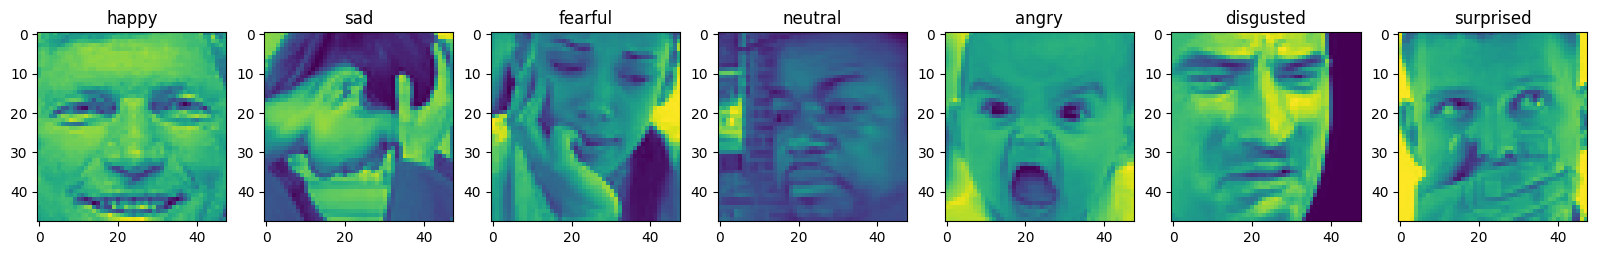

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 7, figsize=(20,8))
for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

##### EDA

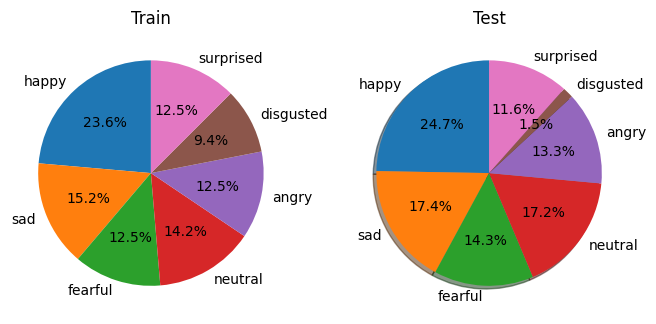

Emotion : happy
	Training : 755
	 Testing : 1774
Emotion : sad
	Training : 485
	 Testing : 1247
Emotion : fearful
	Training : 401
	 Testing : 1024
Emotion : neutral
	Training : 455
	 Testing : 1233
Emotion : angry
	Training : 400
	 Testing : 958
Emotion : disgusted
	Training : 301
	 Testing : 111
Emotion : surprised
	Training : 400
	 Testing : 831


In [4]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%', startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))


In [5]:
train_count = {expression: len(os.listdir(os.path.join(train_dir, expression))) 
                for expression in os.listdir(train_dir)}
train_count_df = pd.DataFrame(train_count, index=['train'])

test_count = {expression: len(os.listdir(os.path.join(test_dir, expression))) 
               for expression in os.listdir(test_dir)}
test_count_df = pd.DataFrame(test_count, index=['test'])

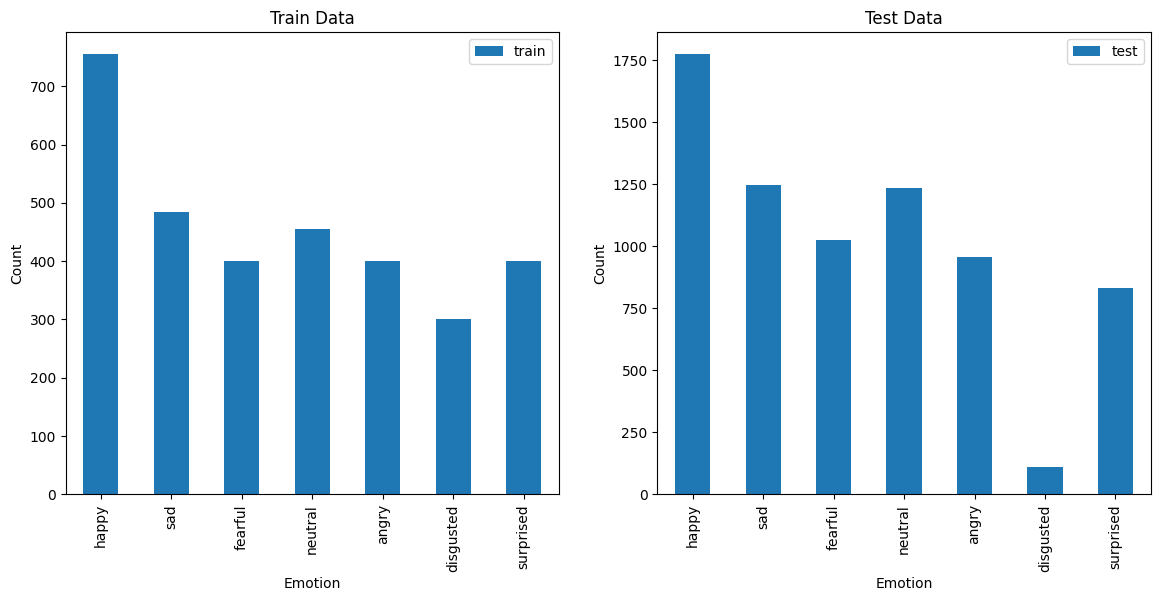

In [6]:
# Plotting data distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
train_count_df.transpose().plot(kind='bar', ax=plt.gca())
plt.title('Train Data')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
test_count_df.transpose().plot(kind='bar', ax=plt.gca())
plt.title('Test Data')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

- Male and Females Count.

In [7]:
from transformers import pipeline
# from transformers import ViTImageProcessor, ViTForImageClassification

genderClassificationModel = pipeline(task="image-classification", model="rizvandwiki/gender-classification")

#read image
# sample_img_path = train_dir+target_var[0]+'/'+os.listdir(train_dir+target_var[0]+'/')[0]
# sample_img = plt.imread(sample_img_path)



In [8]:
genderClassificationModel

In [9]:
# #read image
print("YY::", target_var[0])
# print("XX::", os.listdir(train_dir+target_var[0]+'/').index("im987.png"))
sample_img_path = train_dir+target_var[0]+'/'+os.listdir(train_dir+target_var[0]+'/')[303]
sample_img = plt.imread(sample_img_path)

result = genderClassificationModel(sample_img_path)


YY:: happy


In [10]:
result

[{'label': 'male', 'score': 0.9621531367301941},
 {'label': 'female', 'score': 0.037846870720386505}]

In [11]:
#Train
trainMenCount = [0,0,0,0,0,0,0]
trainFemaleCount = [0,0,0,0,0,0,0]

#Happy
i=0
# print("::::",i,"::::::")
# for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
target_dir = train_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")
    
            
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [12]:
trainFemaleCount

[105, 0, 0, 0, 0, 0, 0]

In [13]:
trainMenCount

[95, 0, 0, 0, 0, 0, 0]

In [14]:
#Sad

i = 1
# for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
target_dir = train_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [15]:
#fearful
i = 2
# for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
target_dir = train_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [16]:
#neutral
i = 3
# for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
target_dir = train_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [17]:
#angry
i = 4
# for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
target_dir = train_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [18]:
# disgusted
i = 5
# for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
target_dir = train_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [19]:
#surprised
i = 6
# for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
target_dir = train_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [20]:
trainMenCount

[95, 116, 109, 128, 137, 117, 98]

In [21]:
trainFemaleCount

[105, 84, 91, 72, 63, 83, 102]

In [22]:
#Test
testMenCount = [0,0,0,0,0,0,0]
testFemaleCount = [0,0,0,0,0,0,0]

#Happy
i=0
# for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
target_dir = test_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    # print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")


In [23]:
testMenCount

[91, 0, 0, 0, 0, 0, 0]

In [24]:
testFemaleCount

[109, 0, 0, 0, 0, 0, 0]

In [25]:
# sad 
i=1
# for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
target_dir = test_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    # print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")


In [26]:
# fearful 
i=2
# for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
target_dir = test_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    # print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")

In [27]:
# neutral
i=3
# for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
target_dir = test_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    # print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")

In [28]:
# angry
i=4
# for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
target_dir = test_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    # print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")

In [29]:
# disgusted
i=5
# for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
target_dir = test_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110


In [30]:
# surprised
i=6
# for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
target_dir = test_dir + target_var[i] + '/'
file_list = os.listdir(target_dir)

for j in range(min(200, len(file_list))):
    file_name = file_list[j]
    if file_name.startswith('.'):  # This skips system files and directories like .ipynb_checkpoints
        continue

    print(j)
    imagePath = os.path.join(target_dir, file_name)
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [31]:
testMenCount

[91, 108, 104, 118, 135, 77, 111]

In [32]:
testFemaleCount

[109, 92, 96, 82, 65, 34, 89]

Emotion : happy
	Training : 7215 - 3270 are male, 3945 are female
	 Testing : 1774 - 835 are male, 939 are female
Emotion : sad
	Training : 4830 - 2530 are male, 2300 are female
	 Testing : 1247 - 666 are male, 581 are female
Emotion : fearful
	Training : 4097 - 2071 are male, 2026 are female
	 Testing : 1024 - 499 are male, 525 are female
Emotion : neutral
	Training : 4965 - 3007 are male, 1958 are female
	 Testing : 1233 -  743 are male, 490 are female
Emotion : angry
	Training : 3995 - 2818 are male, 1177 are female
	 Testing : 958 - 662 are male, 296 are female
Emotion : disgusted
	Training : 436 - 246 are male, 190 are female
	 Testing : 111 - 77 are male, 34 are female
Emotion : surprised
	Training : 3171 - 1576 are male, 1595 are female
	 Testing : 831 - 446 are male, 385 are female

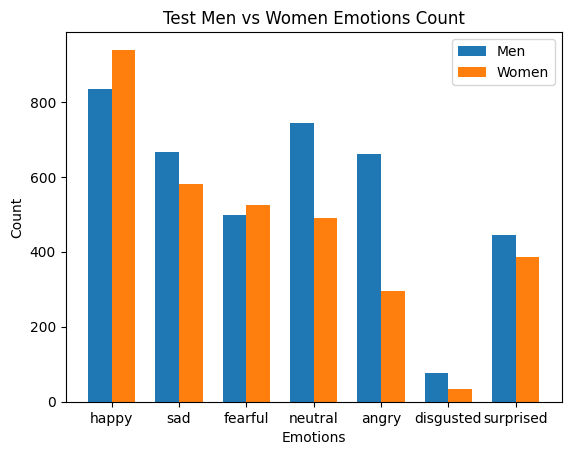

In [33]:
# Define the emotions labels
emotions = ['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']

# Define the test men and women count arrays
testMenCount = [835, 666, 499, 743, 662, 77, 446]
testFemaleCount = [939, 581, 525, 490, 296, 34, 385]

# Define the width of the bars
bar_width = 0.35

# Define the x-axis positions for the bars
x = range(len(emotions))

# Plotting the bars for test men count
plt.bar(x, testMenCount, width=bar_width, label='Men')

# Plotting the bars for test female count
plt.bar([i + bar_width for i in x], testFemaleCount, width=bar_width, label='Women')

# Adding labels and title
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Test Men vs Women Emotions Count')
plt.xticks([i + bar_width/2 for i in x], emotions)
plt.legend()

# Display the plot
plt.show()

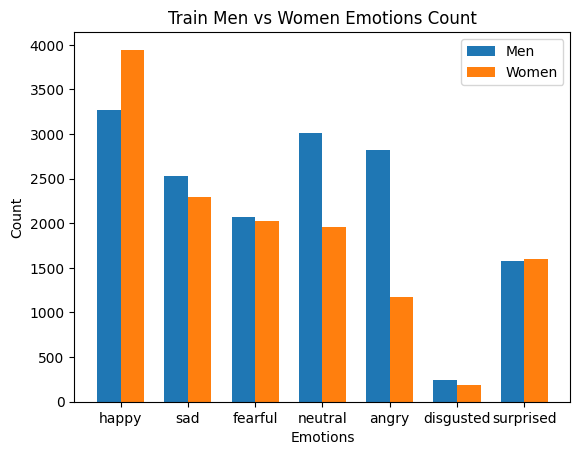

In [34]:
# Define the test men and women count arrays
trainMenCount = [3270, 2530, 2071, 3007, 2818, 246, 1576]
trainFemaleCount = [3945, 2300, 2026, 1958, 1177, 190, 1595]


# Define the width of the bars
bar_width = 0.35

# Define the x-axis positions for the bars
x = range(len(emotions))

# Plotting the bars for test men count
plt.bar(x, trainMenCount, width=bar_width, label='Men')

# Plotting the bars for test female count
plt.bar([i + bar_width for i in x], trainFemaleCount, width=bar_width, label='Women')

# Adding labels and title
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Train Men vs Women Emotions Count')
plt.xticks([i + bar_width/2 for i in x], emotions)
plt.legend()

# Display the plot
plt.show()

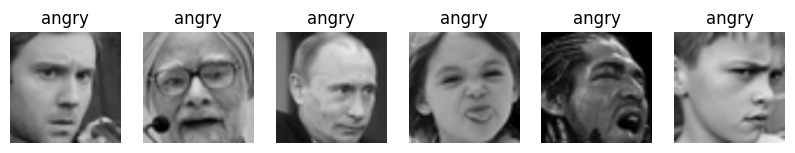

In [35]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split

# Setup directories
train_dir = './data/train'
test_dir = './data/test'

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Define the size of the dataset and split
total_train = len(train_dataset)
val_size = int(0.2 * total_train)
train_size = total_train - val_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Function to show images
# def show_images(dataset, num_images=6):
#     fig, axes = plt.subplots(1, num_images, figsize=(10, 5))
#     for i in range(num_images):
#         ax = axes[i]
#         img, label = dataset[i] 
#         ax.imshow(img.permute(1, 2, 0))
#         ax.axis('off')
#         ax.set_title(dataset.classes[label])
#     plt.show()
def show_images(dataset, indices, num_images=6):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 5))
    for i, idx in enumerate(indices[:num_images]):
        img, label = dataset[idx]
        ax = axes[i]
        ax.imshow(img.permute(1, 2, 0))
        ax.axis('off')
        ax.set_title(train_dataset.classes[label])
    plt.show()

# Display a few images from the train dataset
indices = [i for i, _ in enumerate(train_dataset)]
show_images(train_dataset, indices)


In [36]:
from torch.utils.data import DataLoader

# Data Loaders
batch_size = 16
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [37]:
import timm

# Initialize the model
device = torch.device('cpu')
num_classes = len(train_dataset.classes)
model = timm.create_model('mobilenetv3_large_100', pretrained=True, num_classes=num_classes)
model = model.to(device)
# model = timm.create_model('shufflenetv2_x1_0', pretrained=True, num_classes=num_classes)
# model = model.to(device)

In [38]:
import torch
import torch.nn as nn
from torch.optim import AdamW

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=5e-5)


In [39]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    model.train()
    training_stats = []
    
    for epoch in range(num_epochs):
        total_train_loss = 0
        total_val_loss = 0
        total_val_accuracy = 0
        
        # Training phase
        for batch_index, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

            # Each batch
            if (batch_index + 1) % 10 == 0:
                print(f"Epoch {epoch+1}, Batch {batch_index+1}: Train Loss so far: {total_train_loss / (batch_index + 1)}")

        # Validation phase
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for batch_index, (images, labels) in enumerate(val_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                # Validation update for each batch
                if (batch_index + 1) % 10 == 0:
                    print(f"Epoch {epoch+1}, Validation Batch {batch_index+1}: Validation Loss so far: {total_val_loss / (batch_index + 1)}")

            accuracy = 100 * correct / total
            total_val_accuracy = accuracy

        # Store statistics
        training_stats.append({
            'train_loss': total_train_loss / len(train_loader),
            'val_loss': total_val_loss / len(val_loader),
            'val_accuracy': total_val_accuracy
        })
        
        print(f"Epoch {epoch+1}: Train Loss: {total_train_loss / len(train_loader)}, Val Loss: {total_val_loss / len(val_loader)}, Val Accuracy: {total_val_accuracy}%")
    
    return training_stats

# Call the training function
training_stats = train_model(model, criterion, optimizer, train_loader, val_loader)

Epoch 1, Batch 10: Train Loss so far: 3.0371197938919066
Epoch 1, Batch 20: Train Loss so far: 2.836850476264954
Epoch 1, Batch 30: Train Loss so far: 2.7527682542800904
Epoch 1, Batch 40: Train Loss so far: 2.6806101500988007
Epoch 1, Batch 50: Train Loss so far: 2.656684927940369
Epoch 1, Batch 60: Train Loss so far: 2.6354070683320363
Epoch 1, Batch 70: Train Loss so far: 2.60766270671572
Epoch 1, Batch 80: Train Loss so far: 2.5737469375133513
Epoch 1, Batch 90: Train Loss so far: 2.554113162888421
Epoch 1, Batch 100: Train Loss so far: 2.550251979827881
Epoch 1, Batch 110: Train Loss so far: 2.5159813035618175
Epoch 1, Batch 120: Train Loss so far: 2.511218696832657
Epoch 1, Batch 130: Train Loss so far: 2.475646029985868
Epoch 1, Batch 140: Train Loss so far: 2.443673883165632
Epoch 1, Batch 150: Train Loss so far: 2.4144683845837913
Epoch 1, Batch 160: Train Loss so far: 2.3976795308291914
Epoch 1, Validation Batch 10: Validation Loss so far: 2.105522608757019
Epoch 1, Validatio

In [40]:
def validate_model(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [41]:
validation_accuracy = validate_model(model, val_loader)

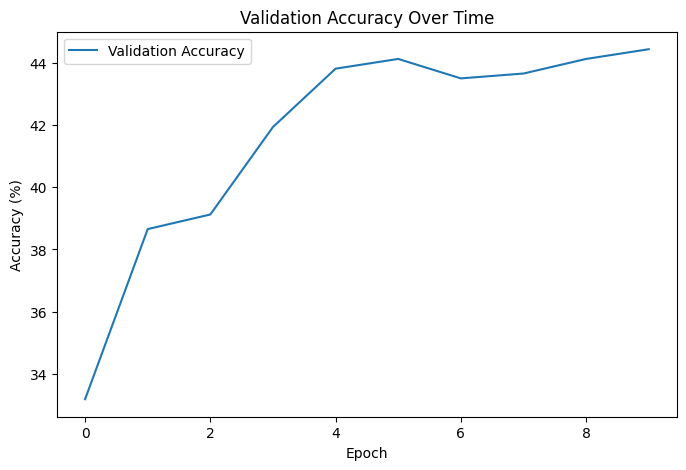

In [42]:
# Plot accuracy or other metrics as needed
plt.figure(figsize=(8, 5))
plt.title('Validation Accuracy Over Time')
plt.plot([x['val_accuracy'] for x in training_stats], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()



In [44]:
import torch

def test_model_detailed(model, test_loader, num_classes):
    model.eval()  # Set the model to evaluation mode
    correct_count = [0] * num_classes
    total_count = [0] * num_classes
    total_correct = 0
    total_samples = 0

    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels)

            # Update per-class statistics
            for label, prediction in zip(labels, predicted):
                total_count[label] += 1
                if label == prediction:
                    correct_count[label] += 1
            
            # Update total statistics
            total_correct += correct_predictions.sum().item()
            total_samples += labels.size(0)
    
    overall_accuracy = 100 * total_correct / total_samples
    print(f'Test Accuracy: {overall_accuracy:.2f}%')

    return correct_count, total_count, overall_accuracy
    
correct_count, total_count, overall_accuracy = test_model_detailed(model, test_loader, num_classes=len(emotions))
incorrect_count = [total_count[i] - correct_count[i] for i in range(len(total_count))]


Test Accuracy: 41.77%


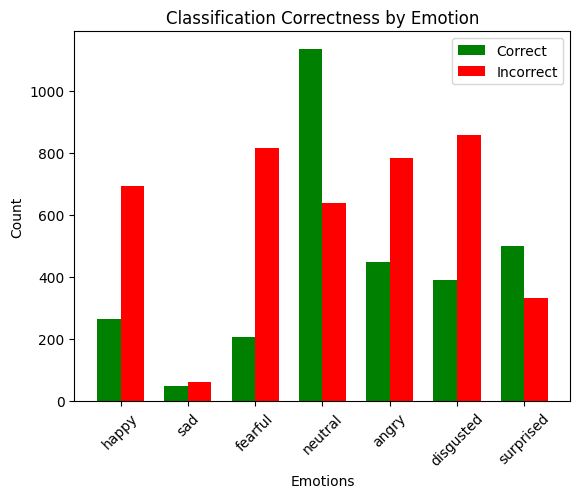

In [45]:
# Define the emotions labels
emotions = ['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']

# Define the width of the bars
bar_width = 0.35

# Define the x-axis positions for the bars
x = range(len(emotions))

# Plotting the bars for correct counts
plt.bar(x, correct_count, width=bar_width, label='Correct', color='green')

# Plotting the bars for incorrect counts
plt.bar([i + bar_width for i in x], incorrect_count, width=bar_width, label='Incorrect', color='red')

# Adding labels, title, and custom x-axis tick labels
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Classification Correctness by Emotion')
plt.xticks([i + bar_width / 2 for i in x], emotions, rotation=45)
plt.legend()

# Display the plot
plt.show()